In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from typing import Union
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from pathlib import Path
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import SGDOneClassSVM

In [5]:
RANDOM_SEED = 42
DATA_PATH = Path("../data")

np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)


In [6]:
train_data = pd.read_csv(DATA_PATH / "train.csv")
test_data = pd.read_csv(DATA_PATH / "test.csv")

In [22]:
test_data.shape

(710400, 53)

In [8]:
train_data=train_data.drop(columns=['faultNumber'])

In [10]:
train_data['num'] = (train_data['simulationRun']-1)*500+train_data['sample']
test_data['num'] = (test_data['simulationRun']-1)*500+test_data['sample']

In [11]:
train_data=train_data.drop(columns=['simulationRun','sample'])
test_data=test_data.drop(columns=['simulationRun','sample'])

In [12]:
test_data=test_data[['xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6',
       'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12',
       'xmeas_13', 'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18',
       'xmeas_19', 'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24',
       'xmeas_25', 'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30',
       'xmeas_31', 'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36',
       'xmeas_37', 'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1',
       'xmv_2', 'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9',
       'xmv_10', 'xmv_11', 'num']]

In [36]:
# 2. K-means 모델 학습 (Train 데이터로 학습)
kmeans = KMeans(n_clusters=1, random_state=42)
kmeans.fit(train_data)

# 3. Test 데이터에 대한 예측 수행
test_cluster_labels = kmeans.predict(test_data)

# 4. 각 샘플과 해당 군집 중심 간 거리 계산
distances = np.linalg.norm(test_data - kmeans.cluster_centers_[test_cluster_labels], axis=1)

# 5. 임계값 설정 (Train 데이터의 95% 백분위수 사용)
train_distances = np.linalg.norm(train_data - kmeans.cluster_centers_[kmeans.labels_], axis=1)
threshold = np.percentile(train_distances, 95)

# 6. 비정상 탐지: 임계값 초과 시 비정상(1), 이하 시 정상(0) 예측
predicted_labels = (distances > threshold).astype(int)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
print(f"Test Data Prediction (0=Normal, 1=Anomaly):\n{predicted_labels}")

Test Data Prediction (0=Normal, 1=Anomaly):
[0 0 0 ... 0 0 0]


In [38]:
predicted_labels.sum()

254401

In [39]:
pred_csv=pd.DataFrame(predicted_labels,columns=['faultNumber'])

In [29]:
pred_csv.to_csv("kmeans.csv")

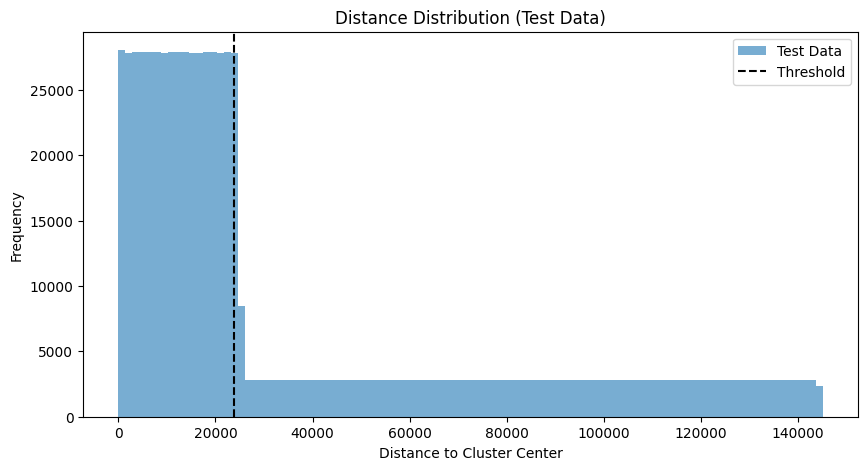

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(distances, bins=100, alpha=0.6, label='Test Data')
plt.axvline(threshold, color='k', linestyle='--', label='Threshold')
plt.legend()
plt.title('Distance Distribution (Test Data)')
plt.xlabel('Distance to Cluster Center')
plt.ylabel('Frequency')
plt.show()